## Linear regression
- The purpose is to learn about linear regression, how to model data and interpret results from linear regression models

### Import libraries

In [1]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.1.1     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



### Assessing linear relationship
- Graphical : Scatter plot
- Statistics : Correlation

In [2]:
cor(mtcars)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
mpg,1.0000000,-0.8521620,-0.8475514,-0.7761684,0.68117191,-0.8676594,0.41868403,0.6640389,0.59983243,0.4802848,-0.55092507
cyl,-0.8521620,1.0000000,0.9020329,0.8324475,-0.69993811,0.7824958,-0.59124207,-0.8108118,-0.52260705,-0.4926866,0.52698829
disp,-0.8475514,0.9020329,1.0000000,0.7909486,-0.71021393,0.8879799,-0.43369788,-0.7104159,-0.59122704,-0.5555692,0.39497686
hp,-0.7761684,0.8324475,0.7909486,1.0000000,-0.44875912,0.6587479,-0.70822339,-0.7230967,-0.24320426,-0.1257043,0.74981247
drat,0.6811719,-0.6999381,-0.7102139,-0.4487591,1.00000000,-0.7124406,0.09120476,0.4402785,0.71271113,0.6996101,-0.09078980
wt,-0.8676594,0.7824958,0.8879799,0.6587479,-0.71244065,1.0000000,-0.17471588,-0.5549157,-0.69249526,-0.5832870,0.42760594
qsec,0.4186840,-0.5912421,-0.4336979,-0.7082234,0.09120476,-0.1747159,1.00000000,0.7445354,-0.22986086,-0.2126822,-0.65624923
vs,0.6640389,-0.8108118,-0.7104159,-0.7230967,0.44027846,-0.5549157,0.74453544,1.0000000,0.16834512,0.2060233,-0.56960714
am,0.5998324,-0.5226070,-0.5912270,-0.2432043,0.71271113,-0.6924953,-0.22986086,0.1683451,1.00000000,0.7940588,0.05753435
gear,0.4802848,-0.4926866,-0.5555692,-0.1257043,0.69961013,-0.5832870,-0.21268223,0.2060233,0.79405876,1.0000000,0.27407284


- negative relationship

[1] -0.8676594

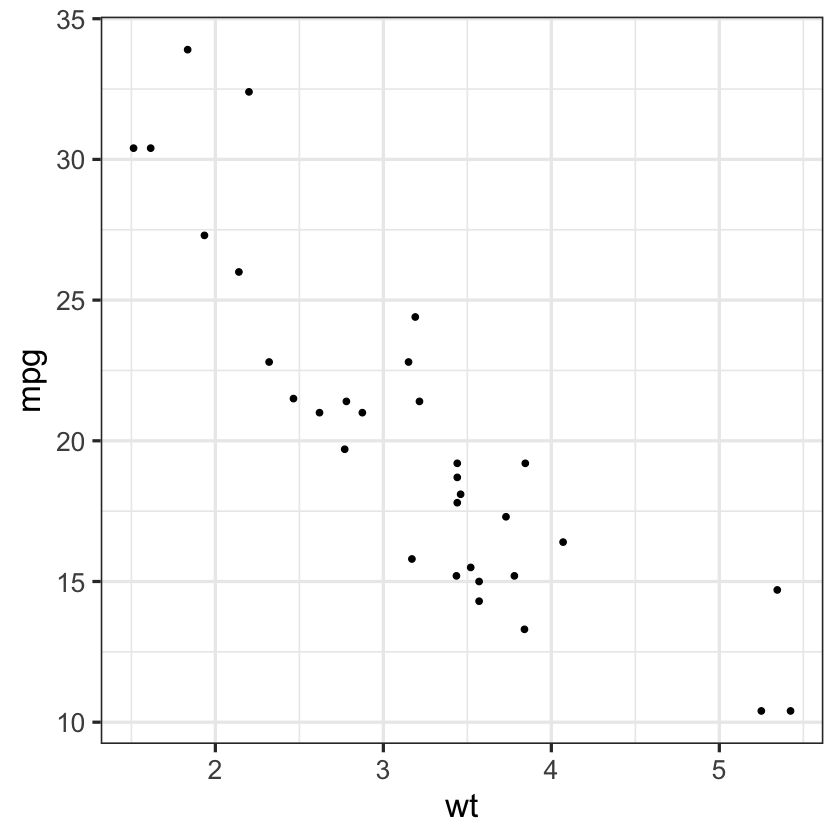

In [3]:
ggplot(data = mtcars, mapping = aes(x = wt, y = mpg)) +
geom_point() + 
theme_bw(base_size = 20)
cor(mtcars$mpg, mtcars$wt)

- positive relationship

[1] 0.7909486

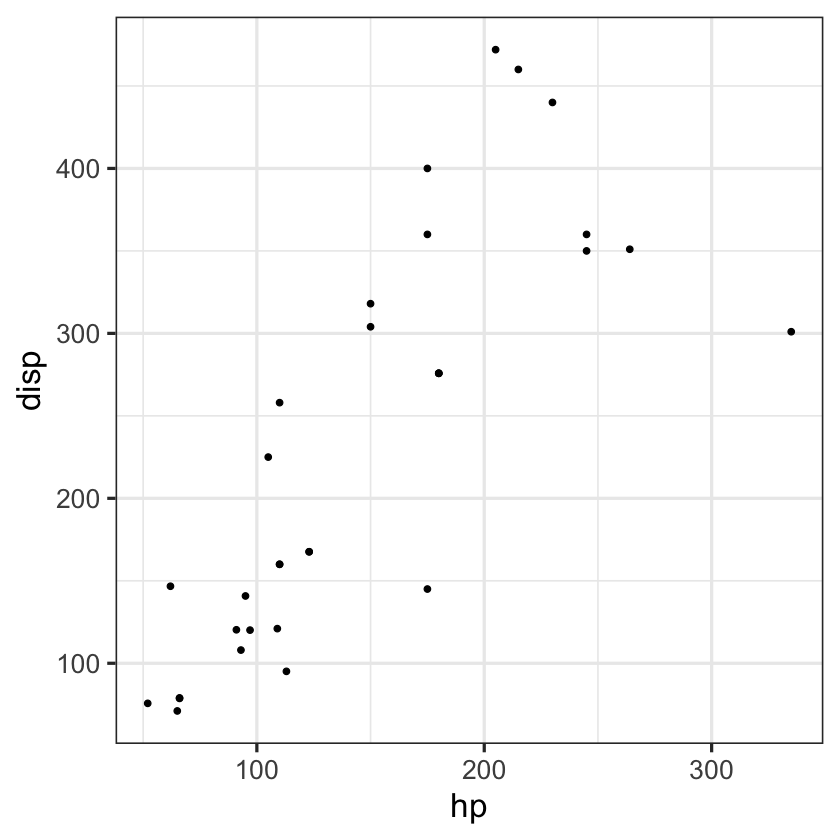

In [4]:
ggplot(data = mtcars, mapping = aes(x = hp, y = disp)) +
geom_point() +
theme_bw(base_size = 20)
cor(mtcars$hp, mtcars$disp)

- No relationship

[1] 0.09120476

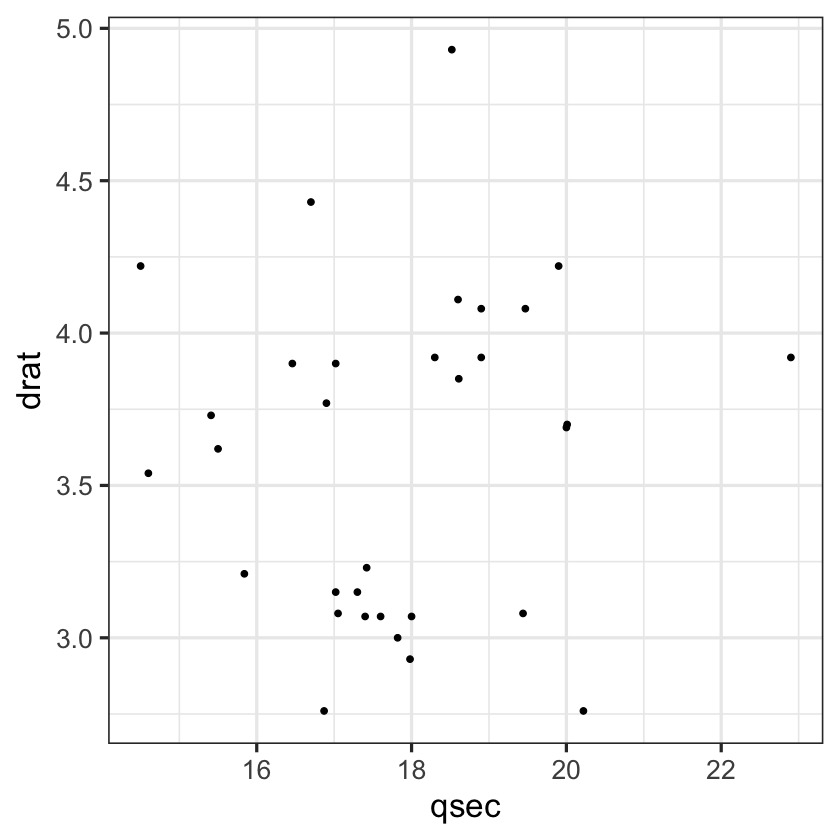

In [5]:
ggplot(data = mtcars, mapping = aes(x = qsec, y = drat)) +
geom_point() +
theme_bw(base_size = 20)
cor(mtcars$qsec, mtcars$drat)

### Simple linear regression
- Simple linear regression allows us to summarize and study relationships between two continuous (quantitative) variables
    - One variable, denoted `x`, is regarded as the `predictor`, `explanatory`, or `independent` variable
    - The other variable, denoted `y`, is regarded as the `response`, `outcome`, or `dependent` variable
    - The equation for best fitting line is `ŷi = b0 + b1 * xi` where `b0` and `b1` are `regression parameters`
        - b1 tells : if the value we saw for x was one unit bigger, how much would our prediction for y changes ?
        - b0 tells : what would we predict for y if x = 0 ?
        

### Error
- In general, when we use `ŷi = b0 + b1 * xi` to predict the actual response `yi`, we make prediction error (or residual error) of size `ei = yi − ŷi` 
- A line that fits the data `best` will be one for which the n `prediction errors` — one for each observed data point — are `as small as possible` in some `overall` sense


### Linear regression assumptions
- Residual must be normally distributed with zero mean

### Method of least squares
- Choose the b’s (parameters) so that the sum of the squares of errors (ei) are minimized
- The error function is
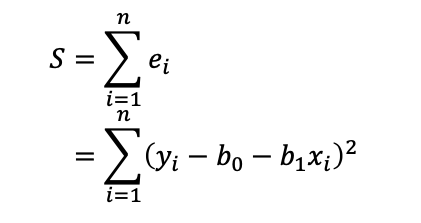

- Minimum of a function is the point where the slope is zero

### Coefficient of determination R2
- The coefficient of determination is a number that indicates the proportion of the variance in the dependent variable that is `predictable` from the independent variables
- The coefficient of determination R2 (or sometimes r2) is another measure of how well the least squares equation `ŷ = b0 + b1 * x` perform as a predictor of `y`
- R2 is computed as `R2 = (SSyy - SSE) / SSyy` = `1 - SSE / SSyy`
- The smaller `SSE`, the more reliable the predictions obtained from the model
- `SSyy` measures the deviation of the observations from their mean
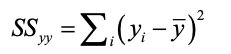
- `SSE` measures the deviation of observations from their predicted values
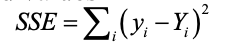
- The higher the R2, the more useful the model. R2 takes on values between 0 and 1
- Essentially, R2 tells us how much better we can do in predicting `y` by using the model than by just using the `mean` of `y`
- If we just use the mean of y as prediction, then we are saying that x does not contribute information about y and thus our predictions of y do not depend on x

In [6]:
model <- lm(mpg ~ wt, mtcars)
summary(model)


Call:
lm(formula = mpg ~ wt, data = mtcars)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.5432 -2.3647 -0.1252  1.4096  6.8727 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  37.2851     1.8776  19.858  < 2e-16 ***
wt           -5.3445     0.5591  -9.559 1.29e-10 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.046 on 30 degrees of freedom
Multiple R-squared:  0.7528,	Adjusted R-squared:  0.7446 
F-statistic: 91.38 on 1 and 30 DF,  p-value: 1.294e-10


### Coefficients
- Estimates : values of the coefficients
- Standard errors : measures amount that the coefficient estimates vary
- t-value : measure of how many standard deviations our coefficient estimate is far away from 0
- Pr(>t) : indicates whether the probability that the impact of the parameter is due to chance


### Residual and R2
- Residual Standard Error is the average amount that the response will deviate from the true regression line
- In multiple regression settings, the R2 will always increase as more variables are included in the model. That is why the adjusted R2 is the preferred measure as it adjusts for the number of variables considered


### F-statistics
- F-statistic is a good indicator of whether there is a relationship between our predictor and the response variables. 
- The further the F-statistic is from 1 the better it is

In [7]:
predict(model, mtcars)

Mazda RX4       Mazda RX4 Wag          Datsun 710      Hornet 4 Drive 
          23.282611           21.919770           24.885952           20.102650 
  Hornet Sportabout             Valiant          Duster 360           Merc 240D 
          18.900144           18.793255           18.205363           20.236262 
           Merc 230            Merc 280           Merc 280C          Merc 450SE 
          20.450041           18.900144           18.900144           15.533127 
         Merc 450SL         Merc 450SLC  Cadillac Fleetwood Lincoln Continental 
          17.350247           17.083024            9.226650            8.296712 
  Chrysler Imperial            Fiat 128         Honda Civic      Toyota Corolla 
           8.718926           25.527289           28.653805           27.478021 
      Toyota Corona    Dodge Challenger         AMC Javelin          Camaro Z28 
          24.111004           18.472586           18.926866           16.762355 
   Pontiac Firebird           Fiat X1-9       Porsche 914-2        Lotus Europa 
          16.735633           26.943574           25.847957           29.198941 
     Ford Pantera L        Ferrari Dino       Maserati Bora          Volvo 142E 
          20.343151           22.480940           18.205363           22.427495

In [8]:
model1 <- lm(hp ~ disp, mtcars)
summary(model1)


Call:
lm(formula = hp ~ disp, data = mtcars)

Residuals:
    Min      1Q  Median      3Q     Max 
-48.623 -28.378  -6.558  13.588 157.562 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  45.7345    16.1289   2.836  0.00811 ** 
disp          0.4375     0.0618   7.080 7.14e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 42.65 on 30 degrees of freedom
Multiple R-squared:  0.6256,	Adjusted R-squared:  0.6131 
F-statistic: 50.13 on 1 and 30 DF,  p-value: 7.143e-08


In [9]:
model2 <- lm(qsec ~ drat, mtcars)
summary(model2)


Call:
lm(formula = qsec ~ drat, data = mtcars)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.5388 -0.9413  0.0324  0.9161  4.9527 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  16.7525     2.2087   7.585 1.86e-08 ***
drat          0.3048     0.6076   0.502     0.62    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.809 on 30 degrees of freedom
Multiple R-squared:  0.008318,	Adjusted R-squared:  -0.02474 
F-statistic: 0.2516 on 1 and 30 DF,  p-value: 0.6196


### Multiple linear regression
- Multiple linear regression is linear regression with two or more predictors
- Multiple linear regression model structure is exactly the same as the linear regression
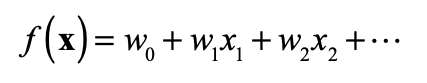
- Mathematically, parameters are obtained by least square method

In [10]:
model3 <- lm(mpg ~ wt + hp, mtcars)
summary(model3)


Call:
lm(formula = mpg ~ wt + hp, data = mtcars)

Residuals:
   Min     1Q Median     3Q    Max 
-3.941 -1.600 -0.182  1.050  5.854 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 37.22727    1.59879  23.285  < 2e-16 ***
wt          -3.87783    0.63273  -6.129 1.12e-06 ***
hp          -0.03177    0.00903  -3.519  0.00145 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.593 on 29 degrees of freedom
Multiple R-squared:  0.8268,	Adjusted R-squared:  0.8148 
F-statistic: 69.21 on 2 and 29 DF,  p-value: 9.109e-12


### Interaction in multiple regression
- Adding interaction terms to a regression model can greatly expand understanding of the relationships among the variables in the model
- Interaction occurs when two or more variables depend on one another for the outcome

In [11]:
model4 <- lm(mpg ~ wt * hp, mtcars)
summary(model4)


Call:
lm(formula = mpg ~ wt * hp, data = mtcars)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.0632 -1.6491 -0.7362  1.4211  4.5513 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 49.80842    3.60516  13.816 5.01e-14 ***
wt          -8.21662    1.26971  -6.471 5.20e-07 ***
hp          -0.12010    0.02470  -4.863 4.04e-05 ***
wt:hp        0.02785    0.00742   3.753 0.000811 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.153 on 28 degrees of freedom
Multiple R-squared:  0.8848,	Adjusted R-squared:  0.8724 
F-statistic: 71.66 on 3 and 28 DF,  p-value: 2.981e-13
